In [4]:
from openpyxl import *
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.random import randn

#Set the inline size of plots
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

wb = load_workbook(filename ='DoubleMass.xlsx')
ws = wb.active

Y = [int(cell.value) for row in ws.iter_rows('B4:B41') for cell in row]
RA = [float(cell.value) for row in ws.iter_rows('C4:C41') for cell in row]
RB = [float(cell.value) for row in ws.iter_rows('D4:D41') for cell in row]
RC = [float(cell.value) for row in ws.iter_rows('E4:E41') for cell in row]

RA = np.array(RA); RB = np.array(RB); RC = np.array(RC)

cRA = np.cumsum(RA); cRB = np.cumsum(RB); cRC = np.cumsum(RC);

BCmean = np.mean(np.vstack((cRB, cRC)),axis=0)

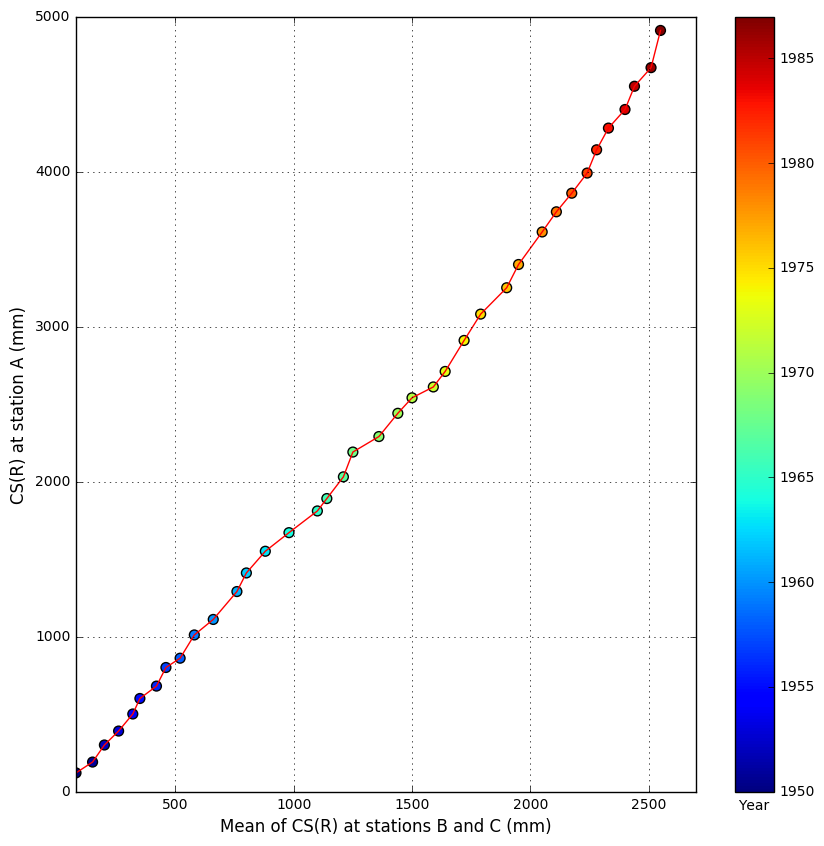

In [5]:
plt.figure(1)
plt.plot(BCmean,cRA,'-r')
plt.scatter(BCmean,cRA,50,Y)
plt.axis([80,2700,0,5000])
plt.grid(True)
plt.colorbar(ticks=Y[::5]).ax.set_xlabel('Year')


plt.xlabel('Mean of CS(R) at stations B and C (mm)',fontsize=12)
plt.ylabel('CS(R) at station A (mm)',fontsize=12)
plt.savefig('original.pdf',bbox_inches='tight')
plt.show()

In [17]:
#We observe a kink in the gradient at t=1971.
#We seek the index where Y=1971

here = 0
while Y[here] != 1971:
    here+=1

#Simple first order polynomial fits. Use polyfit.
qall = np.polyfit(BCmean,cRA,1)
q0 = np.polyfit(BCmean[0:here+1],cRA[0:here+1],1)
qend = np.polyfit(BCmean[here:],cRA[here:],1)

#Use these to compute fit lines (value of the polynomial at X). 
#Use polyval.
pall = np.polyval(qall,BCmean)
p0 = np.polyval(q0,BCmean[0:here+1])
pend = np.polyval(qend,BCmean[here:])

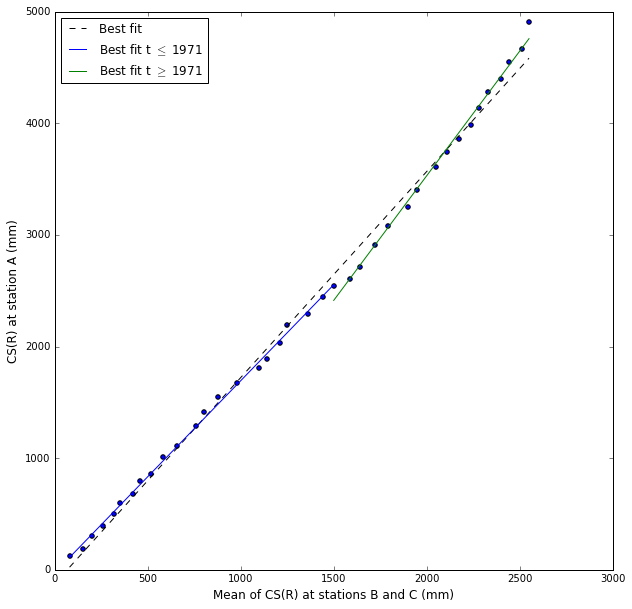

In [35]:
plt.figure(2)
#making scatter plot for cumulative mean and cumulative rain at station A
plt.scatter(BCmean,cRA)

#plotting the best fit line for BC mean with best fit value
plt.plot(BCmean,pall,'--k',label='Best fit')

#making the best fit line for data below break point
plt.plot(BCmean[0:here+1],p0,'-',label='Best fit t $\leq$ 1971')


#making the plot for best fitline for data above break point
plt.plot(BCmean[here:],pend,'-',label='Best fit t $\geq$ 1971')

# plotting legend
plt.legend(loc='upper left')
#plotting xlabel
plt.xlabel('Mean of CS(R) at stations B and C (mm)',fontsize=12)
#plotting ylabel
plt.ylabel('CS(R) at station A (mm)',fontsize=12)

#defining axis
plt.axis([0,3000,0,5000])

#saving figure
#plt.savefig('fits.pdf',bbox_inches='tight')
# display plot
plt.show()

In [21]:
#calculating correction factor (Dingman,page 157 )
K = qend[0]/q0[0]
#generating zeros up to the data length of station A
Ks = np.zeros(len(RA))
#Assigning the value of K up to break point
Ks[0:here]=K
#assinging the value above break point as 1
Ks[here:] = 1.0
#correction by multiplying by correction factor(K)
RAcorr = np.multiply(Ks,RA)
# Again determining the cumsum for corrected precipitation
cRAcorr = np.cumsum(RAcorr)

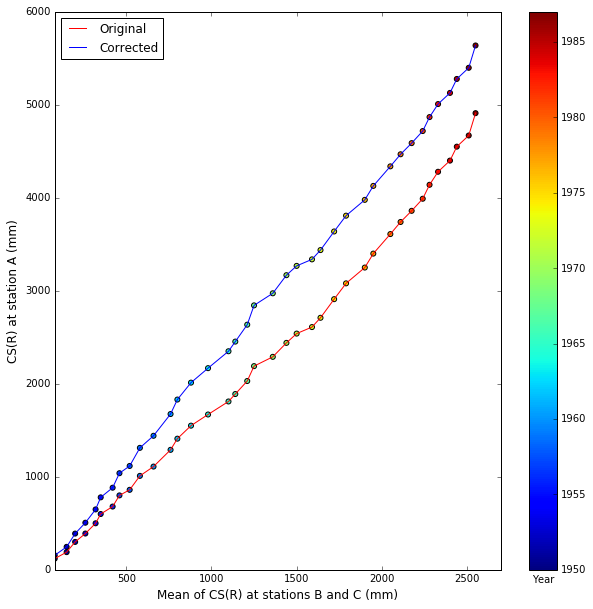

In [6]:
plt.figure(3)
plt.plot(BCmean,cRA,'-r',label='Original')
plt.plot(BCmean,cRAcorr,'-b',label='Corrected')
plt.legend(loc='upper left')
plt.scatter(BCmean,cRA,25,Y)
plt.scatter(BCmean,cRAcorr,25,Y)
plt.axis([80,2700,0,6000])
plt.colorbar(ticks=Y[::5]).ax.set_xlabel('Year')
plt.xlabel('Mean of CS(R) at stations B and C (mm)',fontsize=12)
plt.ylabel('CS(R) at station A (mm)',fontsize=12)
plt.savefig('corrected.pdf',bbox_inches='tight')
plt.show()